In [12]:
!pip install pandas scikit-learn xgboost matplotlib seaborn

### First, we import all the tools we'll need and load our Real_Estate.csv file into a pandas DataFrame. This is the starting point for any data analysis project.

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load the dataset from the CSV file
# Ensure 'Real_Estate.csv' is in the same directory as your notebook.
df = pd.read_csv("/content/Real_Estate.csv")

# Display the first few rows to confirm it loaded correctly
print("Original Data:")
df.head()

Original Data:


,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


### This is where we transform the raw data into more meaningful features for our model. We'll extract the year and month from the transaction date and use K-Means clustering to convert latitude and longitude into distinct neighborhood zones. This process, known as feature engineering, is crucial for improving model accuracy.

In [14]:
# --- Feature Engineering ---

# 1. Convert 'Transaction date' from an object to a datetime format
#    Then, extract the year and month to capture market trends over time.
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df['Transaction Year'] = df['Transaction date'].dt.year
df['Transaction Month'] = df['Transaction date'].dt.month

# 2. Use K-Means to group Latitude/Longitude into neighborhood clusters.
#    This combines two features into one powerful categorical feature.
#    We set n_init=10 to avoid warnings and ensure stable clustering.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Neighborhood_Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# 3. Drop the original columns that are now redundant.
df = df.drop(['Transaction date', 'Latitude', 'Longitude'], axis=1)

# Display the first few rows of the newly engineered data
print("Data after Feature Engineering:")
df.head()

Data after Feature Engineering:


,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,Transaction Year,Transaction Month,Neighborhood_Cluster
0,13.3,4082.0150,8,6.488673,2012,9,0
1,35.5,274.0144,2,24.970725,2012,9,0
2,1.1,1978.6710,10,26.694267,2012,9,4
3,22.2,1055.0670,5,38.091638,2012,9,2
4,8.5,967.4000,6,21.654710,2012,9,1


from matplotlib import pyplot as plt
_df_55['House age'].plot(kind='hist', bins=20, title='House age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Distance to the nearest MRT station'].plot(kind='hist', bins=20, title='Distance to the nearest MRT station')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57['Number of convenience stores'].plot(kind='hist', bins=20, title='Number of convenience stores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['House price of unit area'].plot(kind='hist', bins=20, title='House price of unit area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='House age', y='Distance to the nearest MRT station', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x='Distance to the nearest MRT station', y='Number of convenience stores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61.plot(kind='scatter', x='Number of convenience stores', y='House price of unit area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62.plot(kind='scatter', x='House price of unit area', y='Neighborhood_Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['House age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values('Transaction Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('House age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['Distance to the nearest MRT station']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_64.sort_values('Transaction Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('Distance to the nearest MRT station')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['Number of convenience stores']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_65.sort_values('Transaction Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('Number of convenience stores')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['House price of unit area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_66.sort_values('Transaction Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('House price of unit area')

from matplotlib import pyplot as plt
_df_67['House age'].plot(kind='line', figsize=(8, 4), title='House age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['Distance to the nearest MRT station'].plot(kind='line', figsize=(8, 4), title='Distance to the nearest MRT station')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['Number of convenience stores'].plot(kind='line', figsize=(8, 4), title='Number of convenience stores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_70['House price of unit area'].plot(kind='line', figsize=(8, 4), title='House price of unit area')
plt.gca().spines[['top', 'right']].set_visible(False)

### Here, we'll create even more nuanced features. The goal is to capture complex relationships that the model might otherwise miss.

1. Age Categories : We'll group House age into categories like 'New', 'Modern', and 'Old'. Sometimes, a house being in a specific age bracket is more important than its exact age.

2. Interaction Feature : We'll multiply Distance to the nearest MRT station by Number of convenience stores. This helps the model understand if having many convenience stores is more or less valuable depending on how far the property is from public transport.

3. Polynomial Feature : We'll create a squared version of Distance to the nearest MRT station. This helps the model capture non-linear relationships—for example, the price might drop very quickly for the first 1000m of distance and then level off more slowly.

In [15]:
# --- Advanced Feature Engineering ---

# 1. Create categorical bins for House Age
# We use pd.cut to segment the ages into meaningful groups.
age_bins = [0, 10, 25, 50]
age_labels = ['New', 'Modern', 'Old']
df['House_Age_Category'] = pd.cut(df['House age'], bins=age_bins, labels=age_labels, right=False)

# Convert the new category into numerical format using one-hot encoding
# We set drop_first=True to avoid multicollinearity.
age_dummies = pd.get_dummies(df['House_Age_Category'], prefix='Age_Cat', drop_first=True)
df = pd.concat([df, age_dummies], axis=1)

# 2. Create an interaction feature between Distance and Stores
df['Dist_x_Stores'] = df['Distance to the nearest MRT station'] * df['Number of convenience stores']

# 3. Create a polynomial feature for Distance
df['Dist_sq'] = df['Distance to the nearest MRT station']**2

# Drop the original category column as it's been encoded
df = df.drop('House_Age_Category', axis=1)

# Display the data with all the new features
print("Data after Advanced Feature Engineering:")
df.head()

Data after Advanced Feature Engineering:


,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,Transaction Year,Transaction Month,Neighborhood_Cluster,Age_Cat_Modern,Age_Cat_Old,Dist_x_Stores,Dist_sq
0,13.3,4082.0150,8,6.488673,2012,9,0,True,False,32656.1200,1.666285e+07
1,35.5,274.0144,2,24.970725,2012,9,0,False,True,548.0288,7.508389e+04
2,1.1,1978.6710,10,26.694267,2012,9,4,False,False,19786.7100,3.915139e+06
3,22.2,1055.0670,5,38.091638,2012,9,2,True,False,5275.3350,1.113166e+06
4,8.5,967.4000,6,21.654710,2012,9,1,False,False,5804.4000,9.358628e+05


from matplotlib import pyplot as plt
_df_71['House age'].plot(kind='hist', bins=20, title='House age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72['Distance to the nearest MRT station'].plot(kind='hist', bins=20, title='Distance to the nearest MRT station')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73['Number of convenience stores'].plot(kind='hist', bins=20, title='Number of convenience stores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_74['House price of unit area'].plot(kind='hist', bins=20, title='House price of unit area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_75.groupby('Age_Cat_Modern').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_76.groupby('Age_Cat_Old').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77.plot(kind='scatter', x='House age', y='Distance to the nearest MRT station', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_78.plot(kind='scatter', x='Distance to the nearest MRT station', y='Number of convenience stores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_79.plot(kind='scatter', x='Number of convenience stores', y='House price of unit area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_80.plot(kind='scatter', x='House price of unit area', y='Neighborhood_Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['House age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_81.sort_values('Transaction Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age_Cat_Modern')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age_Cat_Modern', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('House age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['House age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_82.sort_values('Transaction Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age_Cat_Old')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age_Cat_Old', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('House age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['Distance to the nearest MRT station']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_83.sort_values('Transaction Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age_Cat_Modern')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age_Cat_Modern', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('Distance to the nearest MRT station')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Year']
  ys = series['Distance to the nearest MRT station']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_84.sort_values('Transaction Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age_Cat_Old')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age_Cat_Old', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Year')
_ = plt.ylabel('Distance to the nearest MRT station')

from matplotlib import pyplot as plt
_df_85['House age'].plot(kind='line', figsize=(8, 4), title='House age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_86['Distance to the nearest MRT station'].plot(kind='line', figsize=(8, 4), title='Distance to the nearest MRT station')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_87['Number of convenience stores'].plot(kind='line', figsize=(8, 4), title='Number of convenience stores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_88['House price of unit area'].plot(kind='line', figsize=(8, 4), title='House price of unit area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age_Cat_Old'].value_counts()
    for x_label, grp in _df_89.groupby('Age_Cat_Modern')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age_Cat_Modern')
_ = plt.ylabel('Age_Cat_Old')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_90['Age_Cat_Modern'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_90, x='House age', y='Age_Cat_Modern', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_91['Age_Cat_Old'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_91, x='House age', y='Age_Cat_Old', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_92['Age_Cat_Modern'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_92, x='Distance to the nearest MRT station', y='Age_Cat_Modern', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_93['Age_Cat_Old'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_93, x='Distance to the nearest MRT station', y='Age_Cat_Old', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Now, we separate our data into features (X) and the target variable (y). We then split the data into training and testing sets. Finally, we apply Standard Scaling to normalize the features, which ensures that each feature contributes fairly to the model's training process.

In [19]:
# --- Data Preparation ---

# 1. Define the features (X) and the target (y)
#    This is the UPDATED list with all 10 features.
features = [
    'House age',
    'Distance to the nearest MRT station',
    'Number of convenience stores',
    'Transaction Year',
    'Transaction Month',
    'Neighborhood_Cluster',
    # --- Newly Added Features ---
    'Age_Cat_Modern',
    'Age_Cat_Old',
    'Dist_x_Stores',
    'Dist_sq'
]
target = 'House price of unit area'

X = df[features]
y = df[target]

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape of training data (X_train_scaled): {X_train_scaled.shape}")

Shape of training data (X_train_scaled): (331, 10)


### Here, we train three different regression models: a basic Linear Regression, a more complex Random Forest, and a powerful XGBoost model. We then evaluate each model's performance using the R² score and Mean Absolute Error (MAE) to determine which one is the most accurate.

In [20]:
# --- Model Training & Comparison ---

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train) # Training on 10 features now
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R² Score': r2, 'MAE': mae}

results_df = pd.DataFrame(results).T
print(results_df)

                   R² Score        MAE
Linear Regression  0.524992  10.045082
Random Forest      0.477556  10.171382
XGBoost            0.434981  10.191207


### After identifying XGBoost as our best-performing model, we'll investigate why it works well. This plot shows which features the model considered most important when making its predictions. It's a key step for understanding the underlying drivers of real estate prices.

/tmp/ipython-input-2836049683.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


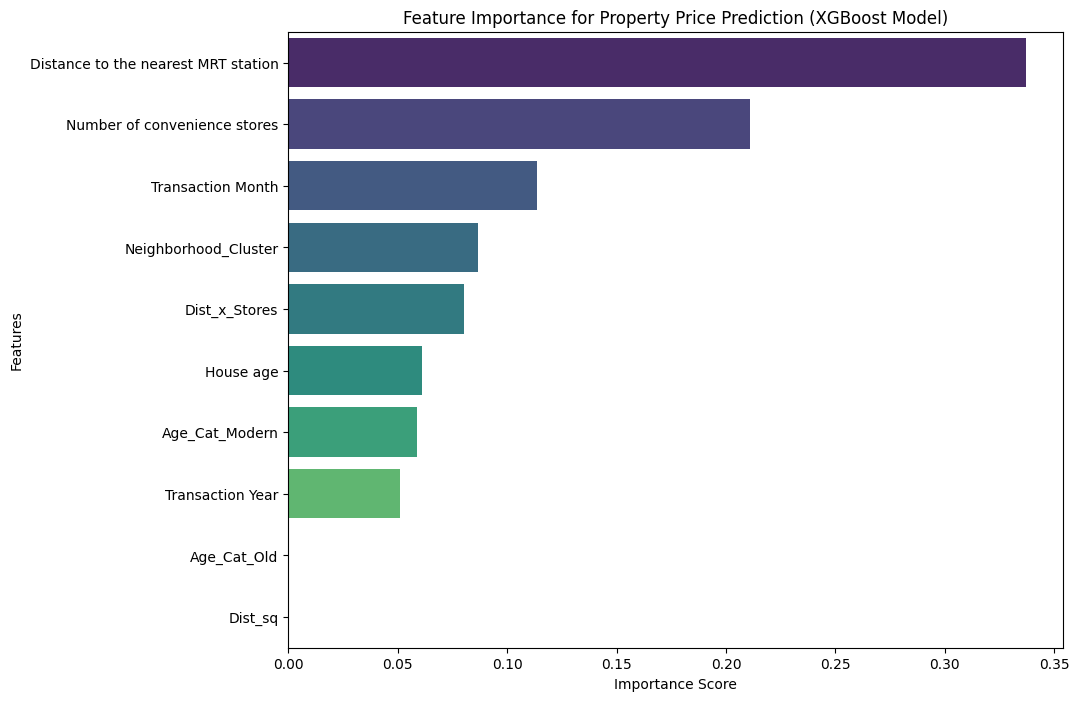

In [21]:
# --- Analyze the Best Model (XGBoost) ---

# 1. Initialize and train the best model again
best_model = XGBRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)

# 2. Extract feature importances
# This will now work because len(best_model.feature_importances_) is 10
# and len(features) is also 10.
feature_importances = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)

# 3. Plot the feature importances
plt.figure(figsize=(10, 8)) # Made figure a bit taller for 10 features
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance for Property Price Prediction (XGBoost Model)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Finally, we create a scatter plot to visually assess our best model's performance. The plot compares the actual house prices from the test set against the prices predicted by our XGBoost model. The closer the points are to the red dashed line, the more accurate the predictions.

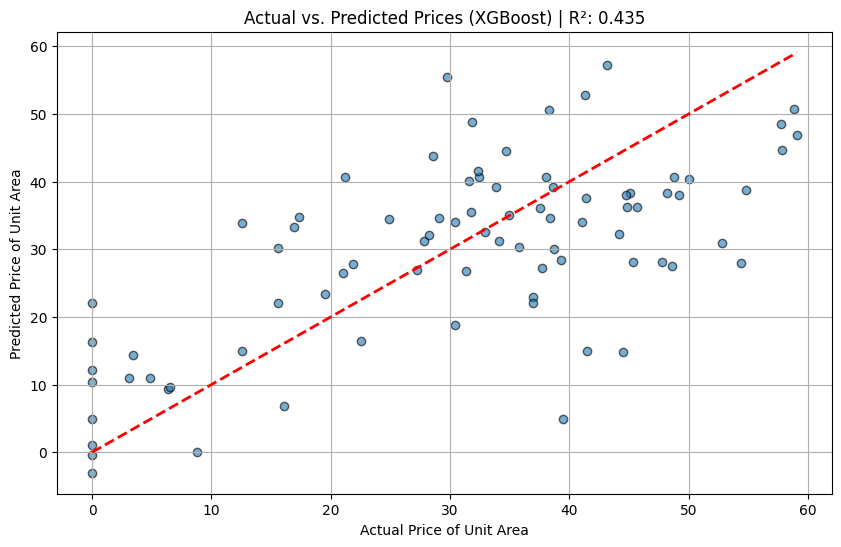

In [22]:
# --- Visualize Final Performance ---

# 1. Make predictions on the scaled test set using our best model
y_pred_best = best_model.predict(X_test_scaled)

# 2. Create a scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, edgecolors='k')

# Add a reference line (y=x) where actual equals predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Add titles and labels for clarity, including the R² score
r2_final = r2_score(y_test, y_pred_best)
plt.title(f'Actual vs. Predicted Prices (XGBoost) | R²: {r2_final:.3f}')
plt.xlabel('Actual Price of Unit Area')
plt.ylabel('Predicted Price of Unit Area')
plt.grid(True)
plt.show()